Dataset taken from:- https://commonslibrary.parliament.uk/research-briefings/cbp-8647/

Import libraries

In [935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [936]:
dataset=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/UK-Parlimentary-Elections/main/1918-2019election_results-.csv", encoding="ISO-8859-1")
dataset.head(3)

,constituency_id,seats,constituency,country/region,electorate,con_votes,con_share,lib_votes,lib_share,lab_votes,lab_share,natSW_votes,natSW_share,oth_votes,oth_share,total_votes,turnout,election,boundary_set
0,1,1,BATTERSEA NORTH,London,38552,NaN,NaN,NaN,NaN,5634,0.334,NaN,NaN,11231.0,0.666,16865,0.437,1918,1918-35
1,2,1,BATTERSEA SOUTH,London,43036,15670.0,0.682,2273,0.099,3383,0.147,NaN,NaN,1657.0,0.072,22983,0.534,1918,1918-35
2,3,1,BERMONDSEY ROTHERHITHE,London,25008,5639.0,0.500,3889,0.345,1750,0.155,NaN,NaN,NaN,NaN,11278,0.451,1918,1918-35


Rename column

In [937]:
dataset.rename(columns={'lib_votes ': 'lib_votes'}, inplace=True)

In [938]:
dataset.columns

Index(['constituency_id', 'seats', 'constituency', 'country/region',
       'electorate', 'con_votes', 'con_share', 'lib_votes', 'lib_share',
       'lab_votes', 'lab_share', 'natSW_votes', 'natSW_share', 'oth_votes',
       'oth_share', 'total_votes', 'turnout ', 'election', 'boundary_set'],
      dtype='object')

In [939]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   constituency_id  17477 non-null  object 
 1   seats            17698 non-null  int64  
 2   constituency     17698 non-null  object 
 3   country/region   17698 non-null  object 
 4   electorate       17623 non-null  object 
 5   con_votes        16585 non-null  float64
 6   con_share        16384 non-null  float64
 7   lib_votes        12421 non-null  object 
 8   lib_share        12381 non-null  float64
 9   lab_votes        16422 non-null  object 
 10  lab_share        16370 non-null  float64
 11  natSW_votes      1596 non-null   float64
 12  natSW_share      1596 non-null   float64
 13  oth_votes        7993 non-null   float64
 14  oth_share        7936 non-null   object 
 15  total_votes      17674 non-null  object 
 16  turnout          17353 non-null  float64
 17  election    

Create new dataset

In [940]:
constituency = dataset.constituency
constituency

0                   BATTERSEA NORTH
1                   BATTERSEA SOUTH
2            BERMONDSEY ROTHERHITHE
3        BERMONDSEY WEST BERMONDSEY
4          BETHNAL GREEN NORTH EAST
                    ...            
17693             Thirsk and Malton
17694                     Wakefield
17695          Wentworth and Dearne
17696                  York Central
17697                    York Outer
Name: constituency, Length: 17698, dtype: object

In [941]:
region = dataset['country/region']
region

0                          London
1                          London
2                          London
3                          London
4                          London
                   ...           
17693    Yorkshire and The Humber
17694    Yorkshire and The Humber
17695    Yorkshire and The Humber
17696    Yorkshire and The Humber
17697    Yorkshire and The Humber
Name: country/region, Length: 17698, dtype: object

In [942]:
dataset['electorate'][699] = np.NaN
dataset['electorate'][3079] = np.NaN
dataset['electorate'][3674] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [943]:
electorate = dataset['electorate'].str[:5]
electorate = electorate
electorate = electorate.astype(float)
electorate

0        38552.0
1        43036.0
2        25008.0
3        23100.0
4        25253.0
          ...   
17693    80991.0
17694    70192.0
17695    74536.0
17696    74899.0
17697    74673.0
Name: electorate, Length: 17698, dtype: float64

In [944]:
con_votes = dataset.con_votes
con_votes

0            NaN
1        15670.0
2         5639.0
3            NaN
4            NaN
          ...   
17693    35634.0
17694    21283.0
17695    14577.0
17696    13767.0
17697    27324.0
Name: con_votes, Length: 17698, dtype: float64

In [945]:
dataset['lib_votes'][897] = np.NaN
dataset['lib_votes'][901] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [946]:
lib_votes = dataset.lib_votes
lib_votes = lib_votes.astype(float)
lib_votes

0           NaN
1        2273.0
2        3889.0
3        4260.0
4           NaN
          ...  
17693    6774.0
17694    1772.0
17695    1705.0
17696    4149.0
17697    9992.0
Name: lib_votes, Length: 17698, dtype: float64

In [947]:
dataset['lab_votes'][778] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [948]:
lab_votes = dataset.lab_votes
lab_votes = lab_votes.astype(float)
lab_votes

0         5634.0
1         3383.0
2         1750.0
3         1956.0
4            NaN
          ...   
17693    10480.0
17694    17925.0
17695    16742.0
17696    27312.0
17697    17339.0
Name: lab_votes, Length: 17698, dtype: float64

In [949]:
natSW_votes = dataset.natSW_votes
natSW_votes

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17693   NaN
17694   NaN
17695   NaN
17696   NaN
17697   NaN
Name: natSW_votes, Length: 17698, dtype: float64

In [950]:
dataset.oth_share[4455] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [951]:
oth_votes = dataset.oth_votes
oth_votes

0        11231.0
1         1657.0
2            NaN
3         4292.0
4         7887.0
          ...   
17693     3700.0
17694     4047.0
17695     8533.0
17696     4277.0
17697      692.0
Name: oth_votes, Length: 17698, dtype: float64

In [952]:
dataset['total_votes'][699] = np.NaN
dataset['total_votes'][794] = np.NaN
dataset['total_votes'][1889] = np.NaN
dataset['total_votes'][2484] = np.NaN
dataset['total_votes'][3079] = np.NaN
dataset['total_votes'][4455] = np.NaN
dataset['total_votes'][4489] = np.NaN

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [953]:
tot_votes = dataset.total_votes
tot_votes = tot_votes.astype(float)
tot_votes

0        16865.0
1        22983.0
2        11278.0
3        10508.0
4         7887.0
          ...   
17693    56588.0
17694    45027.0
17695    41557.0
17696    49505.0
17697    55347.0
Name: total_votes, Length: 17698, dtype: float64

In [954]:
year = dataset['election'].str[:4]
year = year.astype(float)
year

0        1918.0
1        1918.0
2        1918.0
3        1918.0
4        1918.0
          ...  
17693    2019.0
17694    2019.0
17695    2019.0
17696    2019.0
17697    2019.0
Name: election, Length: 17698, dtype: float64

In [955]:
ds=pd.DataFrame({'constituency': constituency, 'region':region, 'electorate': electorate, 'con_votes':con_votes, 'lib_votes': lib_votes, 
                 'lab_votes': lab_votes, 'natSW_votes': natSW_votes, 'oth_votes': oth_votes, 'tot_votes': tot_votes, 'year': year})
ds

,constituency,region,electorate,con_votes,lib_votes,lab_votes,natSW_votes,oth_votes,tot_votes,year
0,BATTERSEA NORTH,London,38552.0,NaN,NaN,5634.0,NaN,11231.0,16865.0,1918.0
1,BATTERSEA SOUTH,London,43036.0,15670.0,2273.0,3383.0,NaN,1657.0,22983.0,1918.0
2,BERMONDSEY ROTHERHITHE,London,25008.0,5639.0,3889.0,1750.0,NaN,NaN,11278.0,1918.0
3,BERMONDSEY WEST BERMONDSEY,London,23100.0,NaN,4260.0,1956.0,NaN,4292.0,10508.0,1918.0
4,BETHNAL GREEN NORTH EAST,London,25253.0,NaN,NaN,NaN,NaN,7887.0,7887.0,1918.0
...,...,...,...,...,...,...,...,...,...,...
17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,35634.0,6774.0,10480.0,NaN,3700.0,56588.0,2019.0
17694,Wakefield,Yorkshire and The Humber,70192.0,21283.0,1772.0,17925.0,NaN,4047.0,45027.0,2019.0
17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,14577.0,1705.0,16742.0,NaN,8533.0,41557.0,2019.0
17696,York Central,Yorkshire and The Humber,74899.0,13767.0,4149.0,27312.0,NaN,4277.0,49505.0,2019.0


In [956]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   constituency  17698 non-null  object 
 1   region        17698 non-null  object 
 2   electorate    17620 non-null  float64
 3   con_votes     16585 non-null  float64
 4   lib_votes     12419 non-null  float64
 5   lab_votes     16421 non-null  float64
 6   natSW_votes   1596 non-null   float64
 7   oth_votes     7993 non-null   float64
 8   tot_votes     17667 non-null  float64
 9   year          17698 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.4+ MB


In [957]:
winner = ds[['con_votes','lib_votes', 'lab_votes', 'natSW_votes', 'oth_votes']].idxmax(axis=1)
winner

0        oth_votes
1        con_votes
2        con_votes
3        oth_votes
4        oth_votes
           ...    
17693    con_votes
17694    con_votes
17695    lab_votes
17696    lab_votes
17697    con_votes
Length: 17698, dtype: object

Check for null values

In [958]:
winner.isnull().sum()

2

In [959]:
ds.isnull().sum()

constituency        0
region              0
electorate         78
con_votes        1113
lib_votes        5279
lab_votes        1277
natSW_votes     16102
oth_votes        9705
tot_votes          31
year                0
dtype: int64

Impute null values

In [960]:
winner.fillna('oth_votes',inplace=True)

In [961]:
winner.isnull().sum()

0

In [962]:
for column in ds.columns:
    ds[column].fillna(ds[column].mode()[0], inplace=True)

In [963]:
ds.isnull().sum().sum()

0

Map dictionary  -  {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'natSW_votes':4, 'oth_votes':5}

In [964]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'natSW_votes':4, 'oth_votes':5}
winner = winner.map(party)
winner

0        5
1        1
2        1
3        5
4        5
        ..
17693    1
17694    1
17695    3
17696    3
17697    1
Length: 17698, dtype: int64

Print off list of object columns

In [965]:
ds.dtypes[ds.dtypes != 'int64'][ds.dtypes != 'float64']

constituency    object
region          object
dtype: object

Ordinal encode

In [966]:
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

ds.constituency = enc.fit_transform(ds.constituency.values.reshape(-1,1))
ds.region = enc.fit_transform(ds['region'].values.reshape(-1,1))

In [967]:
ds

,constituency,region,electorate,con_votes,lib_votes,lab_votes,natSW_votes,oth_votes,tot_votes,year
0,134.0,4.0,38552.0,-1.0,-1.0,5634.0,1308.0,11231.0,16865.0,1918.0
1,135.0,4.0,43036.0,15670.0,2273.0,3383.0,1308.0,1657.0,22983.0,1918.0
2,175.0,4.0,25008.0,5639.0,3889.0,1750.0,1308.0,-1.0,11278.0,1918.0
3,176.0,4.0,23100.0,-1.0,4260.0,1956.0,1308.0,4292.0,10508.0,1918.0
4,190.0,4.0,25253.0,-1.0,-1.0,-1.0,1308.0,7887.0,7887.0,1918.0
...,...,...,...,...,...,...,...,...,...,...
17693,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,1308.0,3700.0,56588.0,2019.0
17694,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,1308.0,4047.0,45027.0,2019.0
17695,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,1308.0,8533.0,41557.0,2019.0
17696,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,1308.0,4277.0,49505.0,2019.0


Graphical analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


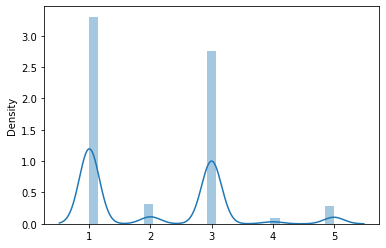

In [968]:
sns.distplot(winner)

In [969]:
import collections
from collections import Counter

counter = Counter(winner)
for k,v in counter.items():
	per = v / len(winner) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=5, Count=755, Percentage=4.266%
Class=1, Count=8658, Percentage=48.921%
Class=3, Count=7245, Percentage=40.937%
Class=2, Count=808, Percentage=4.565%
Class=4, Count=232, Percentage=1.311%


In [970]:
print(Counter(winner))

Counter({1: 8658, 3: 7245, 2: 808, 5: 755, 4: 232})


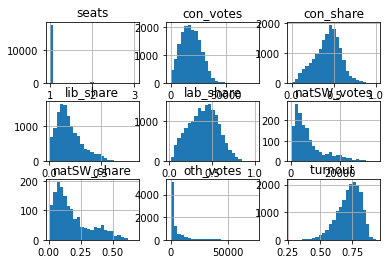

In [971]:
#create histograms of classes
# create histograms of all variables
from pandas import read_csv
from matplotlib import pyplot

# create a histogram plot of each variable
dataset.hist(bins=25)
# show the plot
pyplot.show()

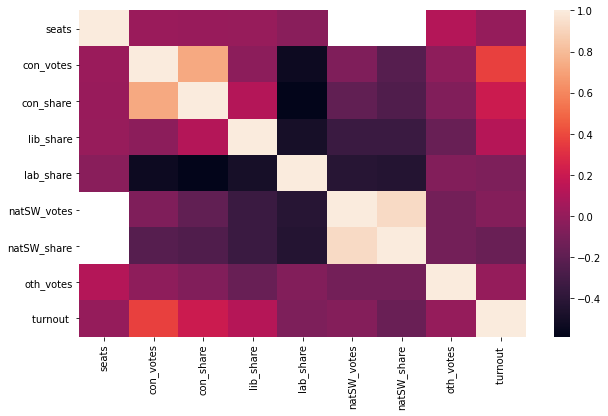

In [972]:
#create a heatmap to correlate promotion
plt.figure(figsize=(10,6))
cmap=dataset.corr()
sns.heatmap(cmap)

Define X and y

In [973]:
y = winner
X = ds

In [974]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   constituency  17698 non-null  float64
 1   region        17698 non-null  float64
 2   electorate    17698 non-null  float64
 3   con_votes     17698 non-null  float64
 4   lib_votes     17698 non-null  float64
 5   lab_votes     17698 non-null  float64
 6   natSW_votes   17698 non-null  float64
 7   oth_votes     17698 non-null  float64
 8   tot_votes     17698 non-null  float64
 9   year          17698 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


Visualise PCA

In [975]:
X.isnull().sum()

constituency    0
region          0
electorate      0
con_votes       0
lib_votes       0
lab_votes       0
natSW_votes     0
oth_votes       0
tot_votes       0
year            0
dtype: int64

In [976]:
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)

In [977]:
X.isnull().sum().sum()

0

In [978]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(17698, 10)

In [979]:
np.mean(X),np.std(X)

(1.0277937640105416e-16, 0.9999999999999999)

In [980]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9']

In [981]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9
0,-1.548895,-0.878295,-1.189375,-1.764983,-0.985204,-1.135973,-0.212743,1.411395,-1.801890,-1.606358
1,-1.547754,-0.878295,-0.910883,-0.141107,-0.598814,-1.389369,-0.212743,-0.096865,-1.354565,-1.606358
2,-1.502133,-0.878295,-2.030564,-1.180549,-0.324229,-1.573196,-0.212743,-0.358061,-2.210391,-1.606358
3,-1.500992,-0.878295,-2.149066,-1.764983,-0.261189,-1.550006,-0.212743,0.318245,-2.266690,-1.606358
4,-1.485024,-0.878295,-2.015348,-1.764983,-0.985204,-1.770307,-0.212743,0.884591,-2.458328,-1.606358
...,...,...,...,...,...,...,...,...,...,...
17693,1.403983,1.736710,1.446423,1.927624,0.165981,-0.590457,-0.212743,0.224983,1.102506,1.609975
17694,1.642358,1.736710,0.775719,0.440529,-0.683942,0.247630,-0.212743,0.279649,0.257209,1.609975
17695,1.664028,1.736710,1.045516,-0.254367,-0.695326,0.114459,-0.212743,0.986360,0.003496,1.609975
17696,1.756412,1.736710,1.068061,-0.338301,-0.280050,1.304328,-0.212743,0.315882,0.584623,1.609975


In [982]:
from sklearn.decomposition import PCA

pca_uk = PCA(n_components=2)
principalComponents_uk = pca_uk.fit_transform(X)

In [983]:
principal_uk_Df = pd.DataFrame(data = principalComponents_uk, columns = ['principal component 1', 'principal component 2'])
principal_uk_Df

,principal component 1,principal component 2
0,3.508117,1.001230
1,2.421603,-0.544080
2,3.845564,-0.568896
3,4.165202,-0.063573
4,4.440694,0.460626
...,...,...
17693,-2.610214,-0.510593
17694,-1.254493,0.588766
17695,-0.929155,1.185118
17696,-1.651566,1.056854


In [984]:
print('Explained variation per principal component: {}'.format(pca_uk.explained_variance_ratio_))

Explained variation per principal component: [0.30504301 0.13541659]


In [985]:
party = {1:'con_votes', 2:'lib_votes', 3:'lab_votes', 4:'nat_SW', 5:'oth_votes'}
winner = winner.map(party)
y = winner
y

0        oth_votes
1        con_votes
2        con_votes
3        oth_votes
4        oth_votes
           ...    
17693    con_votes
17694    con_votes
17695    lab_votes
17696    lab_votes
17697    con_votes
Length: 17698, dtype: object

<Figure size 432x288 with 0 Axes>

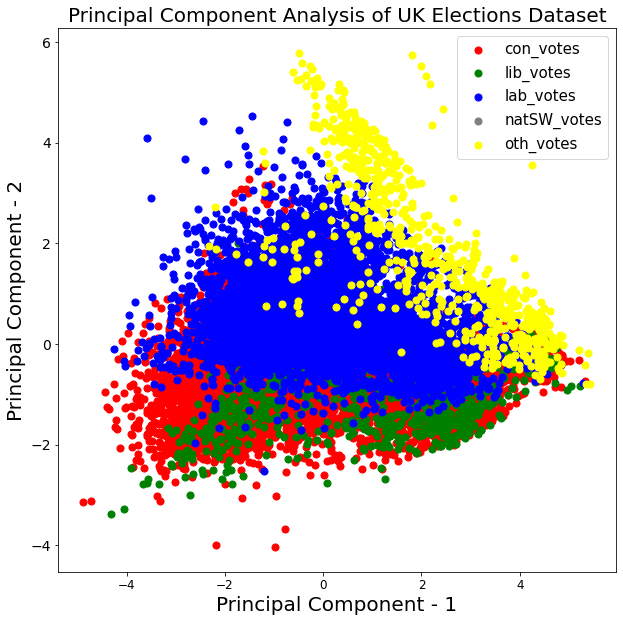

In [986]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of UK Elections Dataset",fontsize=20)
targets = ['con_votes', 'lib_votes', 'lab_votes', 'natSW_votes', 'oth_votes']
colors = ['r', 'g', 'blue', 'grey', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_uk_Df.loc[indicesToKeep, 'principal component 1'], 
                principal_uk_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [987]:
pca_uk = PCA(n_components=10)
principalComponents_uk = pca_uk.fit_transform(X)

Split X up for training and testing

In [988]:
#split train set for testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((15928, 10), (1770, 10), (15928,), (1770,))

Select model

In [989]:
!pip install catboost

In [990]:
from catboost import Pool, CatBoostClassifier, cv

model = CatBoostClassifier(eval_metric='Accuracy',random_seed=1, loss_function='MultiClass').fit(X_train,y_train)
print(model.score(X_train, y_train))

Learning rate set to 0.091124
0:	learn: 0.8216349	total: 23.6ms	remaining: 23.6s
1:	learn: 0.8717981	total: 44.6ms	remaining: 22.3s
2:	learn: 0.8913235	total: 65.5ms	remaining: 21.8s
3:	learn: 0.8947137	total: 85.9ms	remaining: 21.4s
4:	learn: 0.9000502	total: 107ms	remaining: 21.3s
5:	learn: 0.9046334	total: 128ms	remaining: 21.2s
6:	learn: 0.9095304	total: 159ms	remaining: 22.6s
7:	learn: 0.9097815	total: 180ms	remaining: 22.4s
8:	learn: 0.9207685	total: 206ms	remaining: 22.6s
9:	learn: 0.9195756	total: 227ms	remaining: 22.5s
10:	learn: 0.9218985	total: 248ms	remaining: 22.3s
11:	learn: 0.9252888	total: 269ms	remaining: 22.1s
12:	learn: 0.9278629	total: 290ms	remaining: 22s
13:	learn: 0.9304370	total: 310ms	remaining: 21.8s
14:	learn: 0.9328855	total: 330ms	remaining: 21.7s
15:	learn: 0.9330110	total: 350ms	remaining: 21.5s
16:	learn: 0.9364641	total: 371ms	remaining: 21.4s
17:	learn: 0.9382220	total: 391ms	remaining: 21.3s
18:	learn: 0.9389754	total: 426ms	remaining: 22s
19:	learn: 

Predict on validation set

In [991]:
y_pred=model.predict(X_val)
print(model.score(X_val, y_val))

0.9807909604519774


In [992]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
15261,con_votes,con_votes
7250,lab_votes,lab_votes
10656,con_votes,con_votes
16181,lab_votes,lab_votes
3282,con_votes,con_votes
...,...,...
14830,lab_votes,lab_votes
6457,lab_votes,lab_votes
3320,con_votes,con_votes
3672,con_votes,con_votes


In [993]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'natSW_votes':4, 'oth_votes':5}
df.Predicted = df.Predicted.map(party)
df.Predicted

15261    1.0
7250     3.0
10656    1.0
16181    3.0
3282     1.0
        ... 
14830    3.0
6457     3.0
3320     1.0
3672     1.0
6212     1.0
Name: Predicted, Length: 1770, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


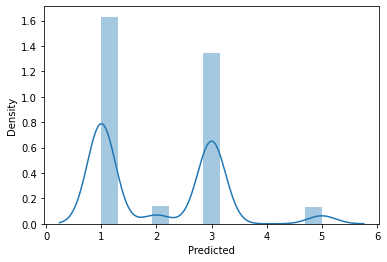

In [994]:
sns.distplot(df.Predicted)

In [995]:
print(Counter(df.Predicted))

Counter({1.0: 877, 3.0: 724, 2.0: 77, 5.0: 70, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


Analyse years

In [996]:
ds['winner'] = winner
ds

,constituency,region,electorate,con_votes,lib_votes,lab_votes,natSW_votes,oth_votes,tot_votes,year,winner
0,134.0,4.0,38552.0,-1.0,-1.0,5634.0,1308.0,11231.0,16865.0,1918.0,oth_votes
1,135.0,4.0,43036.0,15670.0,2273.0,3383.0,1308.0,1657.0,22983.0,1918.0,con_votes
2,175.0,4.0,25008.0,5639.0,3889.0,1750.0,1308.0,-1.0,11278.0,1918.0,con_votes
3,176.0,4.0,23100.0,-1.0,4260.0,1956.0,1308.0,4292.0,10508.0,1918.0,oth_votes
4,190.0,4.0,25253.0,-1.0,-1.0,-1.0,1308.0,7887.0,7887.0,1918.0,oth_votes
...,...,...,...,...,...,...,...,...,...,...,...
17693,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,1308.0,3700.0,56588.0,2019.0,con_votes
17694,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,1308.0,4047.0,45027.0,2019.0,con_votes
17695,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,1308.0,8533.0,41557.0,2019.0,lab_votes
17696,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,1308.0,4277.0,49505.0,2019.0,lab_votes


In [997]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   constituency  17698 non-null  float64
 1   region        17698 non-null  float64
 2   electorate    17698 non-null  float64
 3   con_votes     17698 non-null  float64
 4   lib_votes     17698 non-null  float64
 5   lab_votes     17698 non-null  float64
 6   natSW_votes   17698 non-null  float64
 7   oth_votes     17698 non-null  float64
 8   tot_votes     17698 non-null  float64
 9   year          17698 non-null  float64
 10  winner        17698 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.5+ MB


In [998]:
year = 2019

include = ds[ds['year'].values == year]
exclude = ds[ds['year'].values != year]
include

,constituency,region,electorate,con_votes,lib_votes,lab_votes,natSW_votes,oth_votes,tot_votes,year,winner
17048,380.0,0.0,69906.0,29590.0,3741.0,9178.0,1308.0,1619.0,44128.0,2019.0,con_votes
17049,388.0,0.0,71581.0,20346.0,4608.0,20491.0,1308.0,1856.0,47301.0,2019.0,lab_votes
17050,432.0,0.0,75208.0,34112.0,4779.0,9439.0,1308.0,2169.0,50499.0,2019.0,con_votes
17051,437.0,0.0,75255.0,36308.0,7187.0,7243.0,1308.0,2211.0,52949.0,2019.0,con_votes
17052,447.0,0.0,78151.0,33934.0,9195.0,12073.0,1308.0,1775.0,56977.0,2019.0,con_votes
...,...,...,...,...,...,...,...,...,...,...,...
17693,2723.0,15.0,80991.0,35634.0,6774.0,10480.0,1308.0,3700.0,56588.0,2019.0,con_votes
17694,2932.0,15.0,70192.0,21283.0,1772.0,17925.0,1308.0,4047.0,45027.0,2019.0,con_votes
17695,2951.0,15.0,74536.0,14577.0,1705.0,16742.0,1308.0,8533.0,41557.0,2019.0,lab_votes
17696,3032.0,15.0,74899.0,13767.0,4149.0,27312.0,1308.0,4277.0,49505.0,2019.0,lab_votes


In [999]:
party = {'con_votes':1, 'lib_votes':2, 'lab_votes':3, 'natSW_votes':4, 'oth_votes':5}
winner = winner.map(party)
winner

0        5.0
1        1.0
2        1.0
3        5.0
4        5.0
        ... 
17693    1.0
17694    1.0
17695    3.0
17696    3.0
17697    1.0
Length: 17698, dtype: float64

In [1000]:
total_con = include['con_votes'].sum()
total_con

13966439.0

In [1001]:
total_lib = include['lib_votes'].sum()
total_lib

3696380.0

In [1002]:
total_lab = include['lab_votes'].sum()
total_lab

10269032.0

In [1003]:
total_nat = include['natSW_votes'].sum()
total_nat

2121585.0

In [1004]:
total_oth = include['oth_votes'].sum()
total_oth

2686497.0